# Figure S6. Functional enrichment of colocalized variants. 

- **S6a**. Excess-of-overlap (EOO) analysis of “mappable” CoS (number of colocalized variants $\leq 3$) and other 95% CoS with cV2F score and RegulomeDB annotations. 
- **S6b**. Enrichment analysis of variants comprising “mappable” CoS are significantly enriched in regulatory functional annotations from baseline-LD v2.2, including enhancer, promoter, histone modifications, genomic features, conservation, and other annotations. Error bars denote 95% confidence intervals. 

## Figure S6a
Excess-of-overlap (EOO) analysis of “mappable” CoS (number of colocalized variants $\leq 3$) and other 95% CoS with cV2F score and RegulomeDB annotations. 

In [6]:
result <- readRDS("Figure_S6a.rds")
p <- ggplot(result, aes(x = method, y = enrichment, fill = cate)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), width = 0.7) +
  geom_errorbar(
    aes(ymin = enrichment - error, ymax = enrichment + error),
    position = position_dodge(width = 0.9),
    width = 0.25
  ) +
  scale_fill_manual(values = c("mappable" = "#3366CC", "other" = "#FF9933")) +
  labs(
    title = NULL,
    x = NULL,
    y = "Excess of Overlap",
    fill = "Category"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text( size = 28, hjust = 0.5 ),
    axis.title.x = element_text( margin = margin(t = 0), size = 24), # Adjust x axis title margin
    axis.title.y = element_text(margin = margin(r = 10), size = 24), # Adjust y axis title margin
    axis.text.x = element_text(margin = margin(t = 0), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    legend.position = "inside",
    legend.justification = c(0.95, 0.95),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

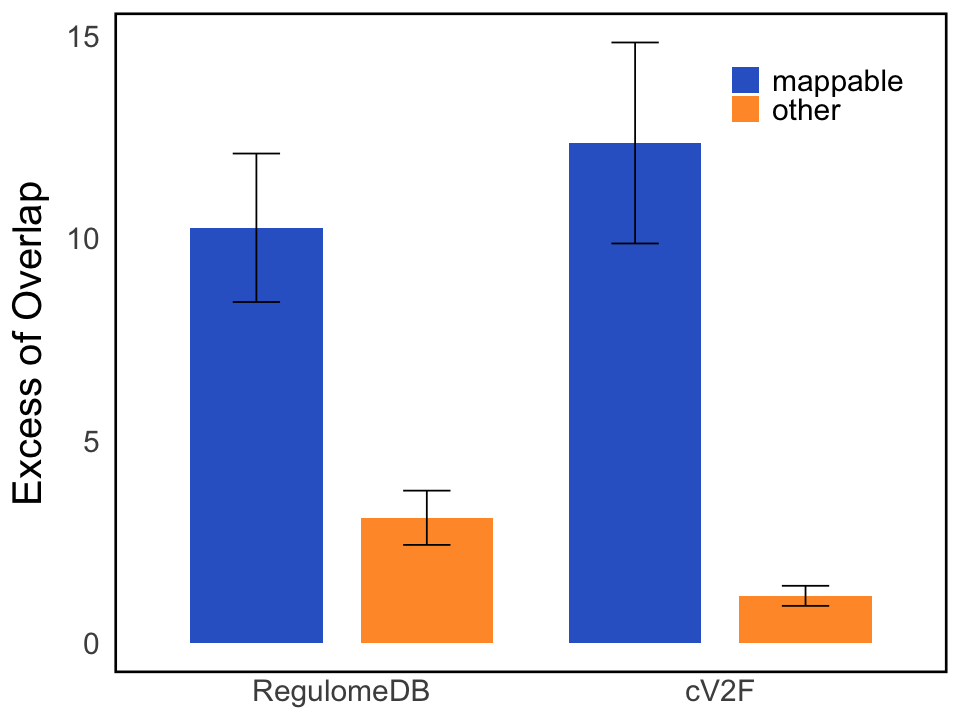

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
p

## Figure S6b

Enrichment analysis of variants comprising “mappable” CoS are significantly enriched in regulatory functional annotations from baseline-LD v2.2, including enhancer, promoter, histone modifications, genomic features, conservation, and other annotations. Error bars denote 95% confidence intervals. 

In [2]:
results <- readRDS("Figure_S6b.rds")
Enrichment <- rowMeans(do.call(cbind, results$Enrichment))
Enrich_sd <- matrix(NA, nrow = length(Enrichment), ncol = 1)
for (i in 1:length(Enrichment)){
  for (j in 1:1){
    values_Enrich <- c()
    for (k in 1:length(results$OR_blockjacknife)){
      values_Enrich[k] <- results$Enrichment_blockjacknife[[k]][i,j]
    }
    Enrich_sd[i,j] <- sqrt(var(values_Enrich)*21**2/22)
  }
}

annotation_category = list(
  
  "Promoter" = c("PromoterFlanking_Hoffman", "PromoterFlanking_Hoffman.flanking.500", "Promoter_UCSC", "Promoter_UCSC.flanking.500","Human_Promoter_Villar","Human_Promoter_Villar.flanking.500","Ancient_Sequence_Age_Human_Promoter","Ancient_Sequence_Age_Human_Promoter.flanking.500","Human_Promoter_Villar_ExAC","Human_Promoter_Villar_ExAC.flanking.500")
  ,
  "Enhancer" = c("WeakEnhancer_Hoffman.flanking.500","WeakEnhancer_Hoffman","WeakEnhancer_Hoffman","Enhancer_Andersson", "Enhancer_Andersson.flanking.500", "Enhancer_Hoffman", "Enhancer_Hoffman.flanking.500", "SuperEnhancer_Hnisz", "SuperEnhancer_Hnisz.flanking.500","Human_Enhancer_Villar","Human_Enhancer_Villar.flanking.500","Ancient_Sequence_Age_Human_Enhancer","Ancient_Sequence_Age_Human_Enhancer.flanking.500","Human_Enhancer_Villar_Species_Enhancer_Count")
  ,
  "Histone Modifications" = c("H3K27ac_PGC2.flanking.500","H3K27ac_PGC2","BLUEPRINT_H3K27acQTL_MaxCPP","H3K27ac_Hnisz", "H3K27ac_Hnisz.flanking.500", "H3K4me1_peaks_Trynka", "H3K4me1_Trynka", "H3K4me1_Trynka.flanking.500", "H3K4me3_peaks_Trynka", "H3K4me3_Trynka", "H3K4me3_Trynka.flanking.500", "H3K9ac_peaks_Trynka", "H3K9ac_Trynka", "H3K9ac_Trynka.flanking.500",'BLUEPRINT_H3K4me1QTL_MaxCPP')
  ,
  "Genomic Features"= c("CTCF_Hoffman","CTCF_Hoffman.flanking.500","BivFlnk.flanking.500","BivFlnk","Coding_UCSC", "Coding_UCSC.flanking.500", "Intron_UCSC", "Intron_UCSC.flanking.500", "UTR_3_UCSC", "UTR_3_UCSC.flanking.500", "UTR_5_UCSC", "UTR_5_UCSC.flanking.500","DGF_ENCODE","DGF_ENCODE.flanking.500","DHS_peaks_Trynka","DHS_Trynka","DHS_Trynka.flanking.500","FetalDHS_Trynka","FetalDHS_Trynka.flanking.500","Repressed_Hoffman","Repressed_Hoffman.flanking.500","TFBS_ENCODE","TFBS_ENCODE.flanking.500","Transcr_Hoffman","Transcr_Hoffman.flanking.500","TSS_Hoffman","TSS_Hoffman.flanking.500")
  ,
  "Conservation" = c("Conserved_LindbladToh","Conserved_LindbladToh.flanking.500","Conserved_Vertebrate_phastCons46way","Conserved_Vertebrate_phastCons46way.flanking.500","Conserved_Mammal_phastCons46way","Conserved_Mammal_phastCons46way.flanking.500","Conserved_Primate_phastCons46way","Conserved_Primate_phastCons46way.flanking.500")
  ,
  "Others" = c("BLUEPRINT_DNA_methylation_MaxCPP", "CpG_Content_50kb", 'GERP.NS','GERP.RSsup4','Recomb_Rate_10kb','Nucleotide_Diversity_10kb','Backgrd_Selection_Stat','GTEx_eQTL_MaxCPP','synonymous','non_synonymous')
  
)
library(ggplot2)
library(tidyverse)
library(ggforce)
i.cut <- 1
Enrichment_cut <- data.frame(
  Category = rownames(results$Enrichment_blockjacknife[[1]]),
  Value = Enrichment,
  SD = Enrich_sd[, i.cut]
)
Enrichment_cut <- left_join(Enrichment_cut, stack(annotation_category), by = c("Category" = "values"))
Enrichment_cut <- Enrichment_cut %>% filter(!is.na(ind))
overall_mean_value <- 1 # mean(Enrichment_cut$Value)
p1 <-  ggplot(Enrichment_cut, aes(x = Value, y = reorder(Category,Value))) +
  geom_point(size = 3, color = "#F94144") +
  geom_errorbarh(aes(xmin = Value - SD, xmax = Value + SD), height = 0, color = "grey50", linewidth = 1) +
  theme_bw() +
  theme(
    text = element_text(size = 20),
    strip.text = element_text(size = 24, face = "bold"),
    plot.title = element_text(size = 30, face = "bold")) +
  labs(
    x = NULL,
    y = NULL,
    title = "Functional annotations in baseline LD v2.2 model"
  ) +
  facet_wrap_paginate(~ ind, ncol = 2, scales = "free_y", nrow = 3, strip.position = "top") +
  geom_vline(xintercept = overall_mean_value, linetype = "dashed", color = "grey10", linewidth = 1)

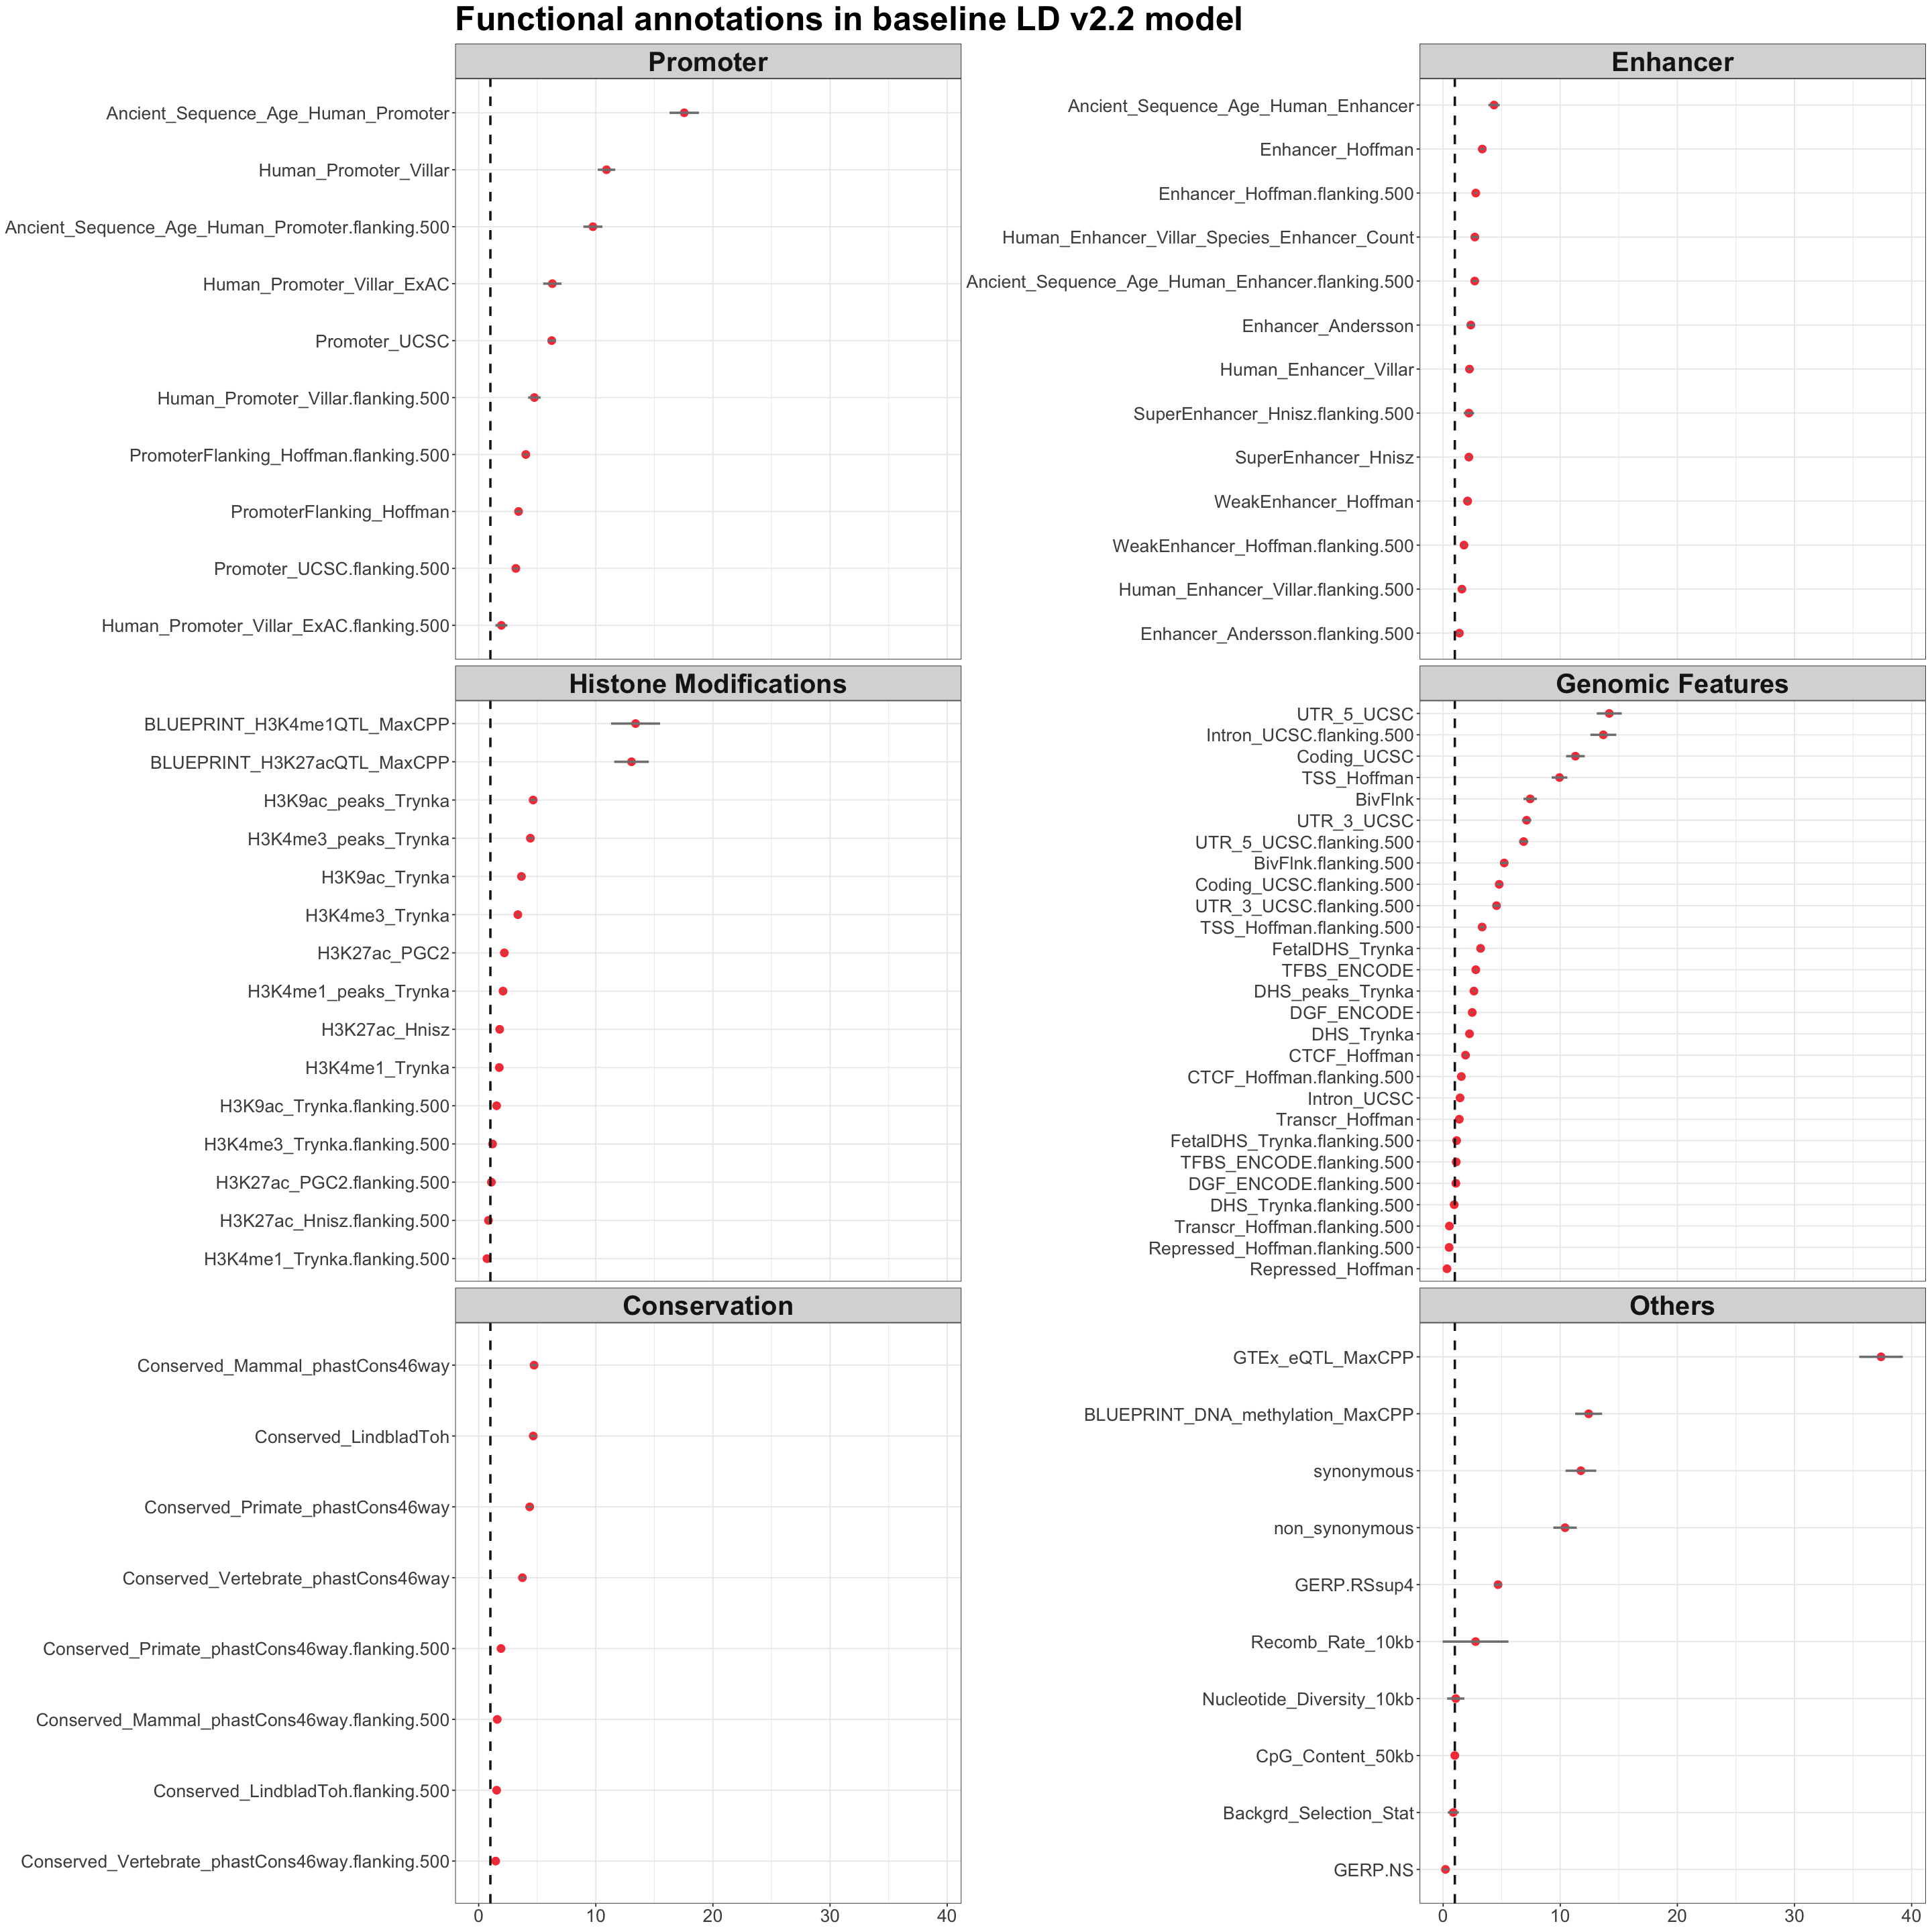

In [4]:
options(repr.plot.width = 24, repr.plot.height = 24)
p1